In [1]:
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
network_csv = pd.read_csv('/Users/mandarmp/Documents/CDKL5Paper/Fig4/CDKL5_E6DT1_Sep262025/Network_outputs/Compiled_Networks.csv')

In [3]:
network_csv.columns

Index(['Run_ID', 'DIV', 'Assay', 'Well', 'NeuronType', 'Time', 'Chip_ID',
       'mean_IBI', 'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak',
       'Number_Bursts', 'burstRate', 'mean_Spike_per_Burst',
       'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs', 'cov_Burst_Peak_Abs',
       'mean_BurstDuration', 'cov_BurstDuration', 'BaselineFiringRate',
       'IBI_List', 'Burst_Peak_List', 'Abs_Burst_Peak_List',
       'Burst_Times_List', 'SpikesPerBurst_List'],
      dtype='object')

In [4]:
network_csv.columns

Index(['Run_ID', 'DIV', 'Assay', 'Well', 'NeuronType', 'Time', 'Chip_ID',
       'mean_IBI', 'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak',
       'Number_Bursts', 'burstRate', 'mean_Spike_per_Burst',
       'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs', 'cov_Burst_Peak_Abs',
       'mean_BurstDuration', 'cov_BurstDuration', 'BaselineFiringRate',
       'IBI_List', 'Burst_Peak_List', 'Abs_Burst_Peak_List',
       'Burst_Times_List', 'SpikesPerBurst_List'],
      dtype='object')

## IF the data is not clean ( remove the contaminated chips, redundant stuff and the outliers)

In [5]:
network_csv = network_csv[network_csv['DIV'].isin([8,13,16,20,23,27])]

['M07039_W1' 'M07039_W2' 'M07039_W3' 'M07039_W4' 'M07039_W5' 'M07039_W6'
 'M07420_W1' 'M07427_W1' 'M07427_W2' 'M07427_W3' 'M07427_W4' 'M07427_W5'
 'M07427_W6' 'M08018_W1' 'M08018_W2' 'M08018_W3' 'M08018_W4' 'M08018_W5'
 'M08018_W6']


/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_52882/3296832697.py:82: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


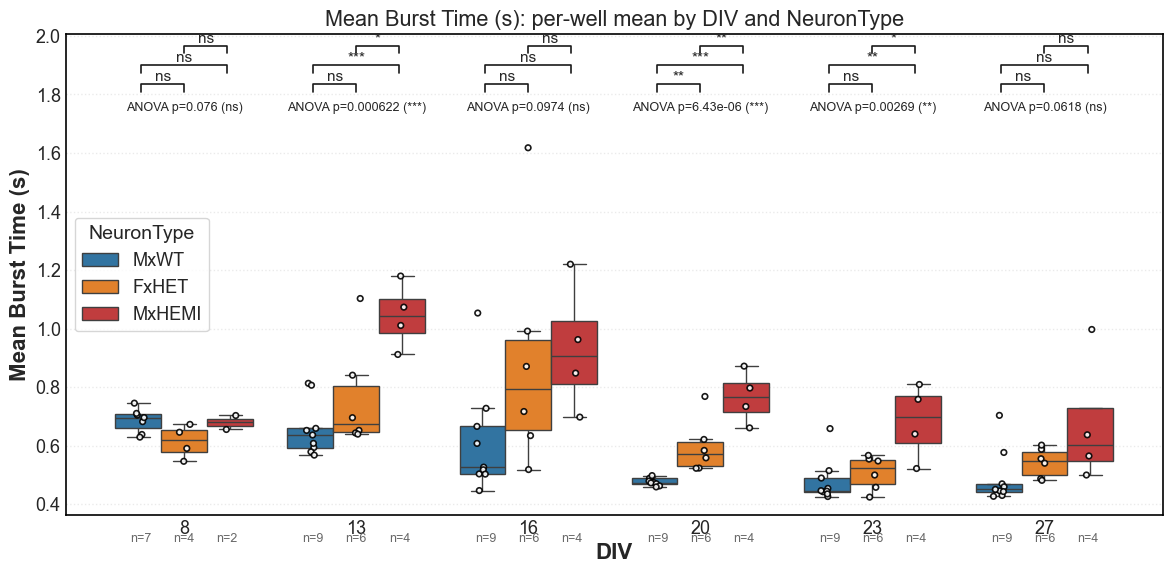

['M07039_W1' 'M07039_W2' 'M07039_W3' 'M07039_W4' 'M07039_W5' 'M07039_W6'
 'M07420_W1' 'M07427_W1' 'M07427_W2' 'M07427_W3' 'M07427_W4' 'M07427_W5'
 'M07427_W6' 'M08018_W1' 'M08018_W2' 'M08018_W3' 'M08018_W4' 'M08018_W5'
 'M08018_W6']


/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_52882/3296832697.py:82: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


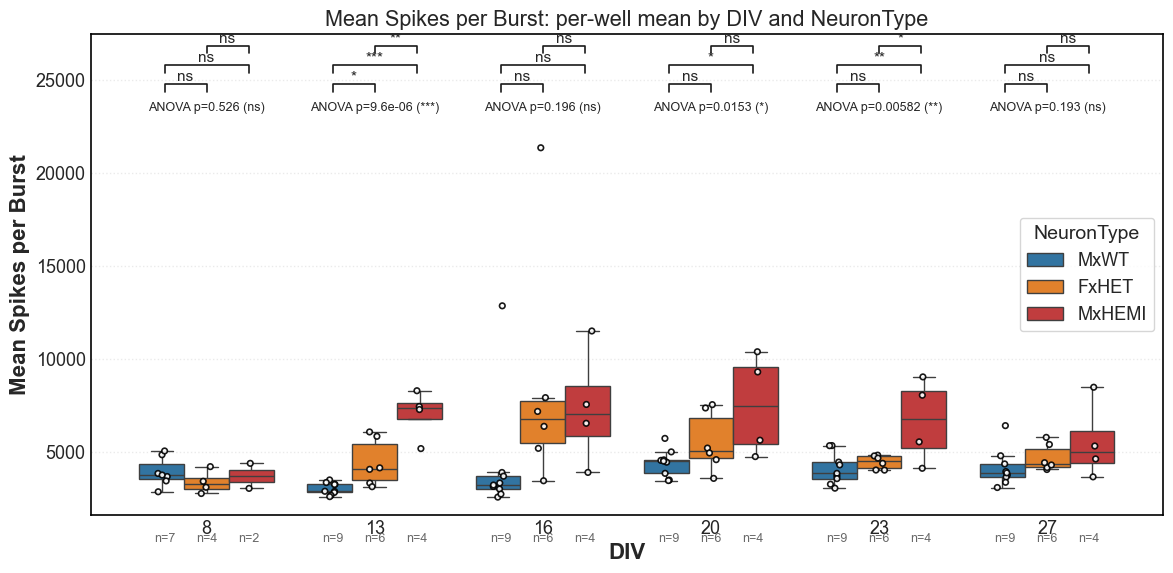

['M07039_W1' 'M07039_W2' 'M07039_W3' 'M07039_W4' 'M07039_W5' 'M07039_W6'
 'M07420_W1' 'M07427_W1' 'M07427_W2' 'M07427_W3' 'M07427_W4' 'M07427_W5'
 'M07427_W6' 'M08018_W1' 'M08018_W2' 'M08018_W3' 'M08018_W4' 'M08018_W5'
 'M08018_W6']


/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_52882/3296832697.py:82: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


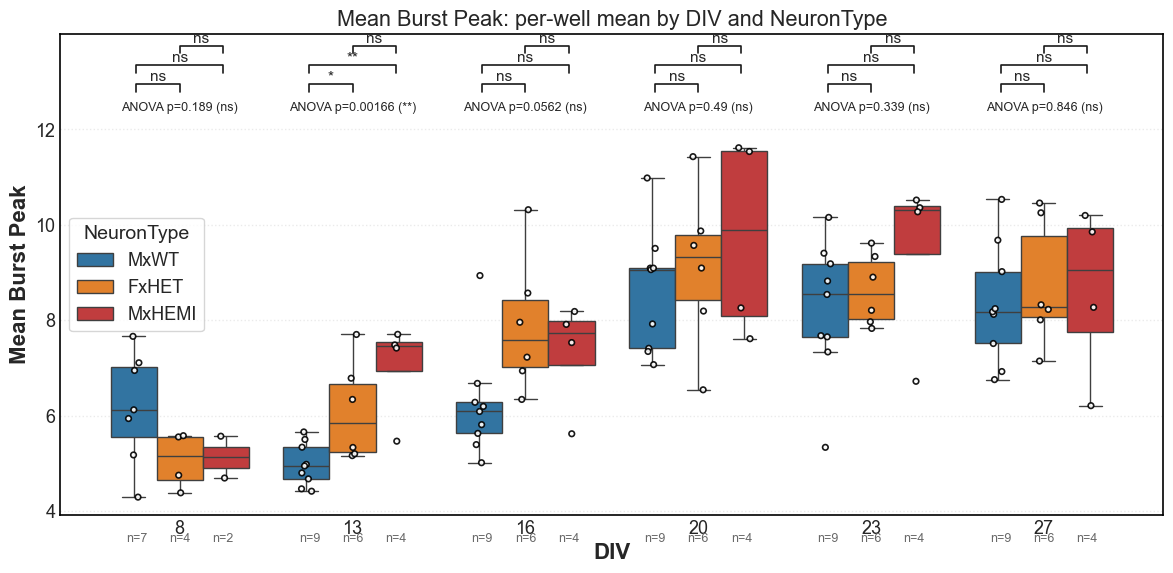

['M07039_W1' 'M07039_W2' 'M07039_W3' 'M07039_W4' 'M07039_W5' 'M07039_W6'
 'M07420_W1' 'M07427_W1' 'M07427_W2' 'M07427_W3' 'M07427_W4' 'M07427_W5'
 'M07427_W6' 'M08018_W1' 'M08018_W2' 'M08018_W3' 'M08018_W4' 'M08018_W5'
 'M08018_W6']


/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_52882/3296832697.py:82: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


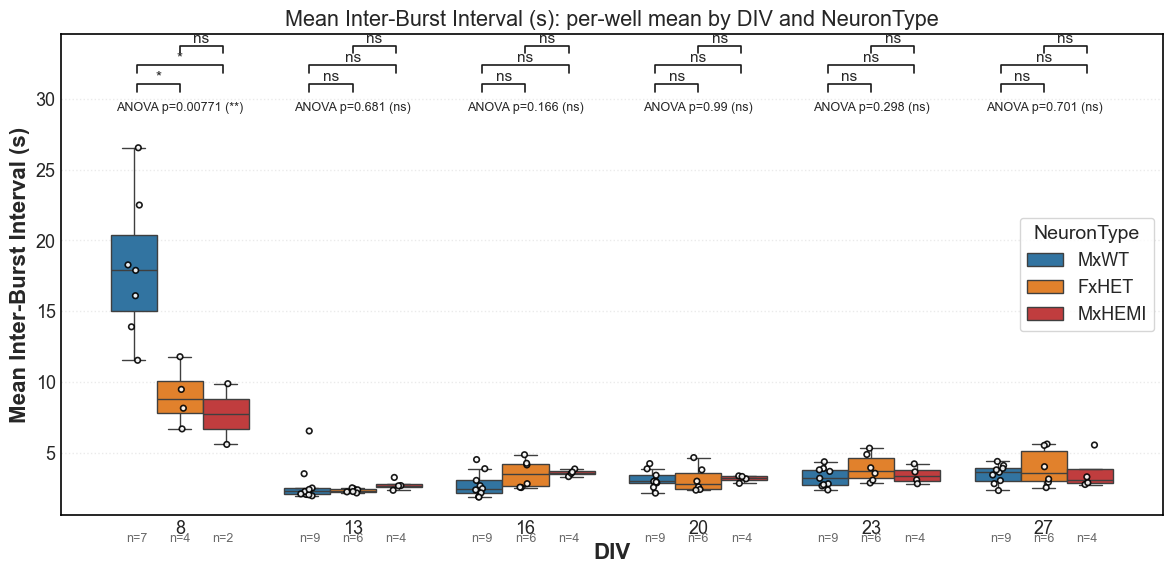

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from itertools import combinations

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sns.set_theme(style='white', font_scale=1.3, rc={
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.labelweight": "bold",
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.title_fontsize": 14,
    "xtick.direction": "in",
    "ytick.direction": "in"
})

def plot_feature_from_list_anova_tukey(
    df,
    list_col,
    feature_label=None,
    plot_type="box",
    order=('MxWT','FxHET','MxHEMI'),
    palette={'MxWT':'#1f77b4','FxHET':'#ff7f0e','MxHEMI':'#d62728'},
    save_path=None
):
    # 1) Ensure numeric list column exists alongside original
    num_col = f"{list_col}_Numeric"
    if num_col not in df.columns:
        df[num_col] = df[list_col].apply(lambda x: [float(i) for i in str(x).split(',')] if pd.notnull(x) else [])

    # 2) Build long form
    long_df = df[['DIV', 'Well', 'Chip_ID', 'NeuronType', num_col]].copy()
    long_df = long_df.rename(columns={num_col: 'Value_List'})
    long_df['ChipID_Well'] = long_df['Chip_ID'].astype(str) + '_W' + long_df['Well'].astype(str)
    long_df = long_df.explode('Value_List').reset_index(drop=True)
    long_df['Value'] = pd.to_numeric(long_df['Value_List'], errors='coerce')
    long_df.dropna(subset=['Value'], inplace=True)
    print(long_df['ChipID_Well'].unique())
    #remove chipid_well == M070420_1
    long_df = long_df[long_df['ChipID_Well'] != 'M07420_1']
    # 3) Aggregate mean per ChipID_Well × NeuronType × DIV (independent unit)
    agg_df = long_df.groupby(['DIV','ChipID_Well','NeuronType']).agg(
        mean_value=('Value','mean')
    ).reset_index()

    # 4) Plot
    feature_label = feature_label or list_col.replace('_', ' ')
    divs = sorted(agg_df['DIV'].unique())
    fig, ax = plt.subplots(figsize=(12,6))

    if plot_type == "box":
        sns.boxplot(
            data=agg_df,
            x="DIV", y="mean_value",
            hue="NeuronType", order=divs,
            hue_order=order, palette=palette,showfliers=False,
            # showcaps=True, showbox=True, notch=True, width=0.6, linewidth=2,
            # whiskerprops=dict(linewidth=2, color='gray'),
            # capprops=dict(linewidth=2, color='gray'),
            # medianprops=dict(linewidth=2.5, color='black'),
            # flierprops=dict(marker='o', markersize=3, markerfacecolor='gray', alpha=0.2),
            ax=ax
        )
    else:
        sns.barplot(
            data=agg_df,
            x="DIV", y="mean_value",
            hue="NeuronType", order=divs,
            hue_order=order, palette=palette, edgecolor='black',
            errorbar=None, capsize=0.15, width=0.7, dodge=True, ax=ax
        )

    # Stripplot overlay
    sns.stripplot(
        data=agg_df, x="DIV", y="mean_value",
        hue="NeuronType", hue_order=order,
        dodge=True,  palette=['white'],size=4, alpha=0.9,
        jitter=0.1, edgecolor='black', linewidth=1.2, ax=ax
    )
    # Keep one legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:len(order)], labels[:len(order)], title="NeuronType")

    # # Mean ± SEM overlay (per DIV × NeuronType)
    # group_stats = agg_df.groupby(['DIV','NeuronType'])['mean_value'].agg(['mean', sem])
    # ntypes = len(order)
    # spacing = 0.7 / ntypes
    # for i, div in enumerate(divs):
    #     for j, nt in enumerate(order):
    #         if (div, nt) in group_stats.index:
    #             m = group_stats.loc[(div, nt), 'mean']
    #             e = group_stats.loc[(div, nt), 'sem']
    #             x_pos = i + j*spacing - (0.35 - spacing/2)
    #             ax.errorbar(x_pos, m, yerr=e, fmt='o', markersize=7,
    #                         capsize=4, elinewidth=2,
    #                         markerfacecolor='black', markeredgecolor='black',
    #                         color='black', zorder=15)

    # Headroom
    ymin, ymax = ax.get_ylim()
    yrange = ymax - ymin
    ax.set_ylim(ymin, ymax + yrange*0.25)

    # Stats per DIV: one-way ANOVA + Tukey HSD
    for i, div in enumerate(divs):
        sub = agg_df[agg_df['DIV'] == div].copy()

        # Ensure groups exist and have at least n>=2 for stability
        counts = sub.groupby('NeuronType')['mean_value'].size()
        valid_groups = [nt for nt in order if counts.get(nt, 0) >= 2]
        if len(valid_groups) < 2:
            # Still print n below
            pass
        sub = sub[sub['NeuronType'].isin(valid_groups)]

        # Omnibus ANOVA (classical). Consider Welch if variances unequal.
        p_anova = np.nan
        if sub['NeuronType'].nunique() >= 2:
            try:
                model = ols("mean_value ~ C(NeuronType)", data=sub).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                if 'C(NeuronType)' in anova_table.index:
                    p_anova = float(anova_table.loc['C(NeuronType)', 'PR(>F)'])
            except Exception:
                # Fallback: simple between-groups ANOVA via scipy if desired
                pass

        if not np.isnan(p_anova):
            sig = "***" if p_anova < 0.001 else "**" if p_anova < 0.01 else "*" if p_anova < 0.05 else "ns"
            ax.text(i, ymax + yrange*0.05, f'ANOVA p={p_anova:.3g} ({sig})',
                    ha='center', fontsize=9)

        # Tukey HSD pairwise comparisons (equal-variance assumption)
        try:
            if sub['NeuronType'].nunique() >= 2:
                tuk = pairwise_tukeyhsd(endog=sub['mean_value'].values,
                                        groups=sub['NeuronType'].values,
                                        alpha=0.05)
                # Parse results table
                results_df = pd.DataFrame(
                    data=tuk._results_table.data[1:],
                    columns=tuk._results_table.data[0]
                )
                # Draw pairwise significance bars following the plotting order
                pairs = list(combinations(order, 2))
                h = yrange * 0.02
                base = yrange * 0.10
                step = 0.05
                for k, (s1, s2) in enumerate(pairs):
                    row = results_df[
                        ((results_df['group1'] == s1) & (results_df['group2'] == s2)) |
                        ((results_df['group1'] == s2) & (results_df['group2'] == s1))
                    ]
                    if row.empty:
                        continue
                    p_adj = float(row['p-adj'].iloc[0])
                    sig = "***" if p_adj < 0.001 else "**" if p_adj < 0.01 else "*" if p_adj < 0.05 else "ns"

                    # horizontal positions aligned to your dodged groups
                    step_x = 0.25
                    x1 = i + (order.index(s1) - 1) * step_x
                    x2 = i + (order.index(s2) - 1) * step_x
                    y = ymax + base + k * (yrange * step)

                    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
                    ax.text((x1 + x2) / 2, y + h, sig, ha='center', va='bottom', fontsize=11)
        except Exception:
            # If Tukey fails (e.g., too few observations), silently skip pairwise bars
            pass

        # Sample sizes (n cultures per group at this DIV)
        counts = sub.groupby('NeuronType')['ChipID_Well'].nunique() if 'ChipID_Well' in sub.columns else sub.groupby('NeuronType')['Well'].nunique()
        for j, nt in enumerate(order):
            n = counts.get(nt, 0)
            x_pos = i + (j - 1) * 0.25
            ax.text(x_pos, ymin - yrange*0.07,
                    f'n={n}', ha='center', fontsize=9, color='dimgrey')

    # Cosmetics
    ax.yaxis.grid(True, linestyle=':', alpha=0.4)
    ax.set_axisbelow(True)
    ylab = feature_label if "time" in (feature_label or "").lower() else feature_label
    ax.set_ylabel(ylab)
    ax.set_xlabel("DIV")
    ax.set_title(f"{feature_label}: per-well mean by DIV and NeuronType")

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='svg', dpi=300)
    plt.show()

# Example calls (adjust save paths)
plot_feature_from_list_anova_tukey(
    network_csv,
    list_col='Burst_Times_List',
    feature_label='Mean Burst Time (s)',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/bursttimes_anova_tukey.svg"
)

plot_feature_from_list_anova_tukey(
    network_csv,
    list_col='SpikesPerBurst_List',
    feature_label='Mean Spikes per Burst',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/spikesperburst_anova_tukey.svg"
)

plot_feature_from_list_anova_tukey(
    network_csv,
    list_col='Burst_Peak_List',
    feature_label='Mean Burst Peak',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/burstpeak_anova_tukey.svg"
)

plot_feature_from_list_anova_tukey(
    network_csv,
    list_col='IBI_List',
    feature_label='Mean Inter-Burst Interval (s)',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/ibi_anova_tukey.svg"
)

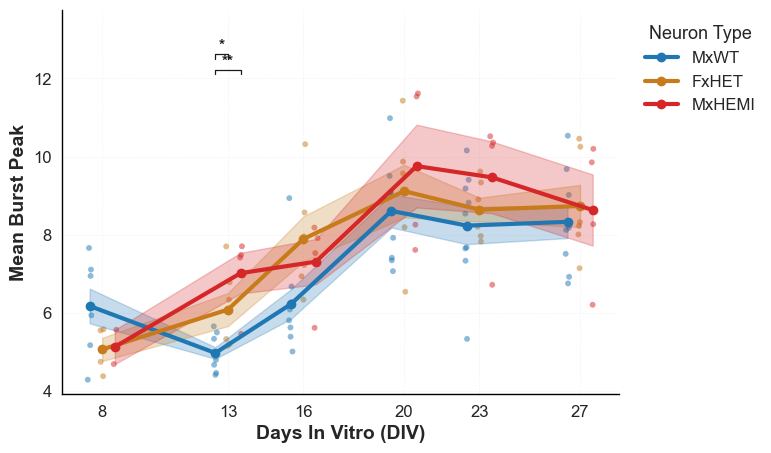

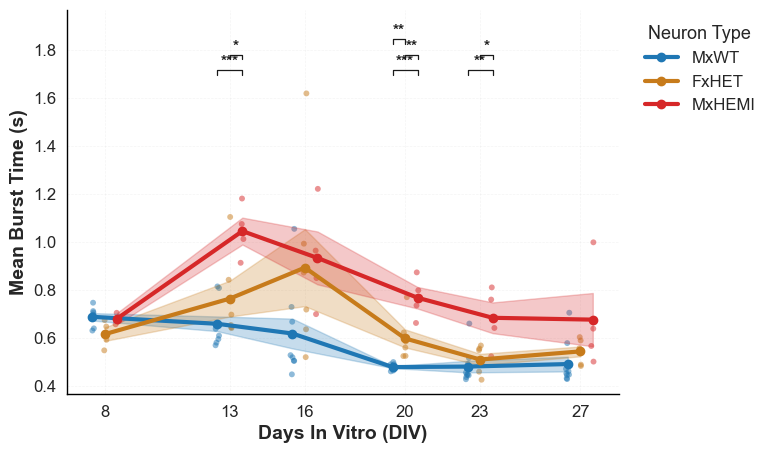

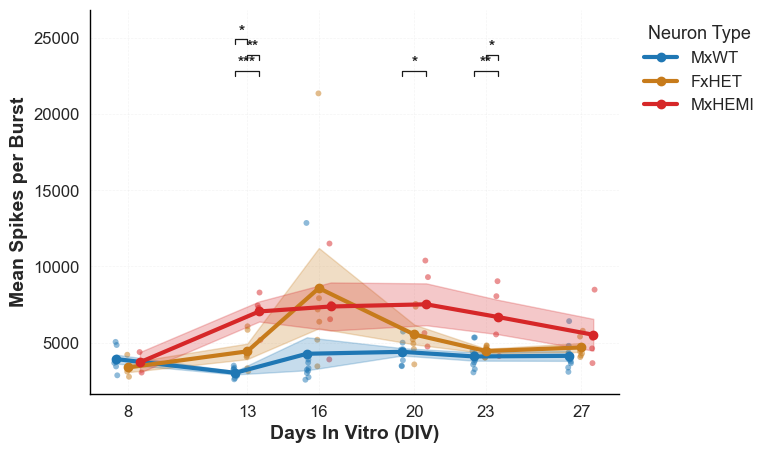

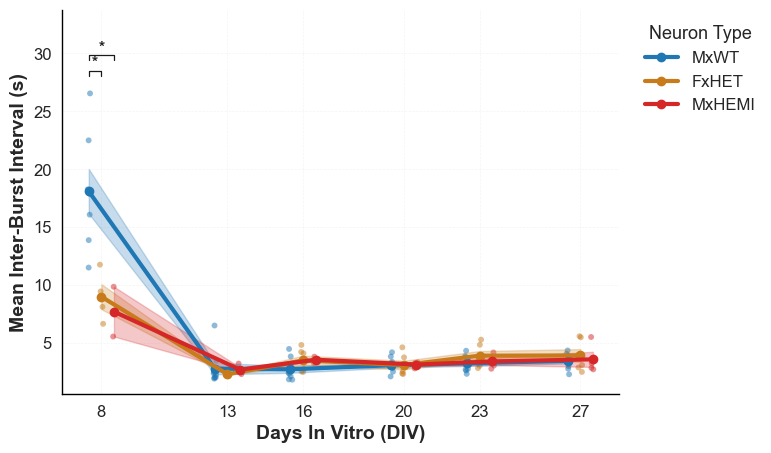

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import sem
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

plt.rcParams.update({
    "font.family": "Arial",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.0,
    "axes.labelsize": 14,
    "axes.labelweight": "bold",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "legend.title_fontsize": 13,
    "xtick.direction": "out",
    "ytick.direction": "out"
})

def plot_feature_line_anova_tukey(
    df,
    list_col,
    feature_label=None,
    order=('MxWT','FxHET','MxHEMI'),
    palette={'MxWT':'#1f77b4','FxHET':'#c77b1b','MxHEMI':'#d62728'},
    save_path=None
):
    """Publication-quality lineplot of per-well mean metric across DIVs with ANOVA + Tukey"""

    # 1) Convert list column → numeric list
    num_col = f"{list_col}_Numeric"
    if num_col not in df.columns:
        df[num_col] = df[list_col].apply(lambda x: [float(i) for i in str(x).split(',')] if pd.notnull(x) else [])

    # 2) Build long form
    long_df = df[['DIV', 'Well', 'Chip_ID', 'NeuronType', num_col]].copy()
    long_df = long_df.rename(columns={num_col: 'Value_List'})
    long_df['ChipID_Well'] = long_df['Chip_ID'].astype(str) + '_W' + long_df['Well'].astype(str)
    long_df = long_df.explode('Value_List').reset_index(drop=True)
    long_df['Value'] = pd.to_numeric(long_df['Value_List'], errors='coerce')
    long_df.dropna(subset=['Value'], inplace=True)

    # 3) Aggregate mean per ChipID_Well × NeuronType × DIV
    agg_df = long_df.groupby(['DIV','ChipID_Well','NeuronType']).agg(mean_value=('Value','mean')).reset_index()

    # 4) Compute group summary (mean ± SEM)
    summary = (
        agg_df
        .groupby(['DIV','NeuronType'])
        .agg(mean_value=('mean_value','mean'), sem_value=('mean_value',sem))
        .reset_index()
    )

    divs = sorted(agg_df['DIV'].unique())
    group_offsets = {'MxWT': -0.5, 'FxHET': 0.0, 'MxHEMI': 0.5}

    # 5) Plot setup
    fig, ax = plt.subplots(figsize=(8, 4.8))

    # Scatter per well (background)
    for nt, color in palette.items():
        sub = agg_df[agg_df['NeuronType'] == nt]
        jitter = (np.random.rand(len(sub)) - 0.5) * 0.15
        ax.scatter(sub['DIV'] + jitter + group_offsets[nt],
                   sub['mean_value'], color=color, alpha=0.5, s=18, edgecolor='none')

    # Mean ± SEM lines (main layer)
    for nt, color in palette.items():
        sub = summary[summary['NeuronType'] == nt]
        offset = group_offsets[nt]
        ax.plot(sub['DIV'] + offset, sub['mean_value'], '-o',
                color=color, lw=3, zorder=3, label=nt)
        ax.fill_between(sub['DIV'] + offset,
                        sub['mean_value'] - sub['sem_value'],
                        sub['mean_value'] + sub['sem_value'],
                        color=color, alpha=0.25, zorder=2)

    # 6) ANOVA + Tukey tests per DIV
    tukey_sig = []
    for div in divs:
        sub = agg_df[agg_df['DIV'] == div]
        if sub['NeuronType'].nunique() < 2:
            continue
        model = ols('mean_value ~ C(NeuronType)', data=sub).fit()
        anova_results = anova_lm(model, typ=2)
        if 'C(NeuronType)' not in anova_results.index:
            continue
        p_anova = anova_results.loc['C(NeuronType)', 'PR(>F)']

        tuk = pairwise_tukeyhsd(sub['mean_value'], sub['NeuronType'], alpha=0.05)
        results_df = pd.DataFrame(tuk._results_table.data[1:], columns=tuk._results_table.data[0])

        for _, row in results_df.iterrows():
            if row['reject']:
                tukey_sig.append((div, row['group1'], row['group2'], float(row['p-adj'])))

    # --- IMPROVED SIGNIFICANCE ANNOTATIONS ---
    ymin, ymax = ax.get_ylim()
    yrange = ymax - ymin
    ax.set_ylim(ymin, ymax + yrange * 0.22)

    for div in divs:
        sig_pairs = [(d, s1, s2, p) for (d, s1, s2, p) in tukey_sig if d == div]
        if not sig_pairs:
            continue

        # Sort so that strongest (lowest p) is plotted on top
        sig_pairs.sort(key=lambda x: x[3])

        for k, (_, s1, s2, p_adj) in enumerate(sig_pairs):
            if p_adj < 0.001:
                sig = '***'
            elif p_adj < 0.01:
                sig = '**'
            elif p_adj < 0.05:
                sig = '*'
            else:
                continue

            # Horizontal alignment
            x1 = div + group_offsets[s1]
            x2 = div + group_offsets[s2]

            # Vertical positioning (scaled dynamically)
            base = ymax * 1.01 + (yrange * 0.05 * k)
            h = yrange * 0.015

            # Draw bracket + star
            ax.plot([x1, x1, x2, x2],
                    [base, base + h, base + h, base],
                    lw=0.9, c='k', clip_on=False)

            ax.text((x1 + x2) / 2, base + h * 1.25, sig,
                    ha='center', va='bottom',
                    fontsize=11, fontweight='bold',
                    color='k', clip_on=False)
    # 8) Final aesthetics
    ax.legend(title='Neuron Type', frameon=False, loc='upper left', bbox_to_anchor=(1.02, 1))
    ax.set_xlabel('Days In Vitro (DIV)', weight='bold')
    ax.set_ylabel(feature_label or list_col.replace('_', ' '), weight='bold')
    ax.tick_params(axis='both', labelsize=12, direction='out', length=4, width=1)
    ax.set_xticks(divs)
    ax.grid(alpha=0.2, linestyle='--', linewidth=0.5)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()


plot_feature_line_anova_tukey(
    network_csv,
    list_col='Burst_Peak_List',
    feature_label='Mean Burst Peak',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig5/line_BurstPeak.svg"
)

plot_feature_line_anova_tukey(
    network_csv,
    list_col='Burst_Times_List',
    feature_label='Mean Burst Time (s)',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig5/line_BurstTime.svg"
)

plot_feature_line_anova_tukey(
    network_csv,
    list_col='SpikesPerBurst_List',
    feature_label='Mean Spikes per Burst',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig5/line_SpikesPerBurst.svg"
)

plot_feature_line_anova_tukey(
    network_csv,
    list_col='IBI_List',
    feature_label='Mean Inter-Burst Interval (s)',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig5/line_IBI.svg"
)

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_6865/722900731.py:64: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


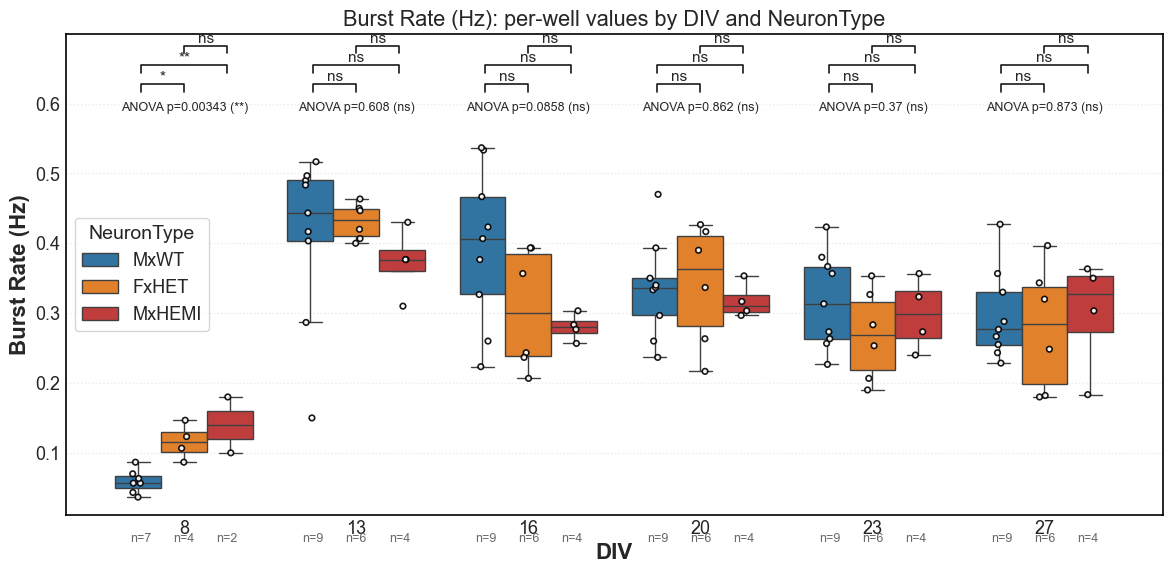

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_6865/722900731.py:64: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


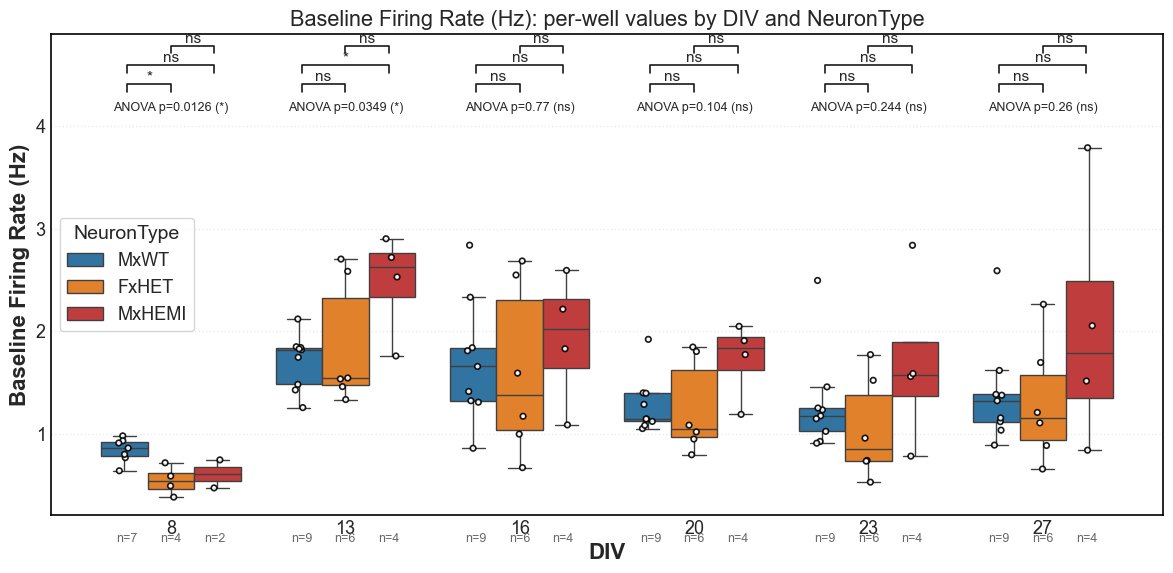

In [17]:
from itertools import combinations
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set_theme(style='white', font_scale=1.3, rc={
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.labelweight": "bold",
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.title_fontsize": 14,
    "xtick.direction": "in",
    "ytick.direction": "in"
})


def plot_scalar_feature(
    df,
    value_col,
    feature_label=None,
    plot_type="box",
    order=('MxWT','FxHET','MxHEMI'),
    palette={'MxWT':'#1f77b4','FxHET':'#ff7f0e','MxHEMI':'#d62728'},
    save_path=None
):
    sub = df[['DIV','NeuronType','Chip_ID','Well', value_col]].copy()
    sub['ChipID_Well'] = sub['Chip_ID'].astype(str) + '_W' + sub['Well'].astype(str)
    sub = sub[sub['ChipID_Well'] != 'M07420_1']
    sub = sub.dropna(subset=[value_col])
    if sub.empty:
        print(f"No data for {value_col}; skipping.")
        return

    feature_label = feature_label or value_col.replace('_',' ')
    divs = sorted(sub['DIV'].unique())
    fig, ax = plt.subplots(figsize=(12,6))

    if plot_type == "box":
        sns.boxplot(
            data=sub, x="DIV", y=value_col,
            hue="NeuronType", order=divs,
            hue_order=order, palette=palette,showfliers=False,
            # showcaps=True, showbox=True, notch=True, width=0.6, linewidth=2,
            # whiskerprops=dict(linewidth=2, color='gray'),
            # capprops=dict(linewidth=2, color='gray'),
            # medianprops=dict(linewidth=2.5, color='black'),
            # flierprops=dict(marker='o', markersize=3, markerfacecolor='gray', alpha=0.2),
            ax=ax
        )
    else:
        sns.barplot(
            data=sub, x="DIV", y=value_col,
            hue="NeuronType", order=divs,
            hue_order=order, palette=palette, edgecolor='black',
            errorbar=None, capsize=0.15, width=0.7, dodge=True, ax=ax
        )

    sns.stripplot(
        data=sub, x="DIV", y=value_col,
        hue="NeuronType", hue_order=order,
        dodge=True,  palette=['white'],size=4, alpha=0.9,
        jitter=0.1, edgecolor='black', linewidth=1.2, ax=ax
    )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:len(order)], labels[:len(order)], title="NeuronType")

    # # Mean ± SEM overlay
    # group_stats = sub.groupby(['DIV','NeuronType'])[value_col].agg(['mean', sem])
    # ntypes = len(order); spacing = 0.7 / ntypes
    # for i, div in enumerate(divs):
    #     for j, nt in enumerate(order):
    #         if (div, nt) in group_stats.index:
    #             m = group_stats.loc[(div, nt), 'mean']
    #             e = group_stats.loc[(div, nt), 'sem']
    #             x_pos = i + j*spacing - (0.35 - spacing/2)
    #             ax.errorbar(x_pos, m, yerr=e, fmt='o', markersize=7,
    #                         capsize=4, elinewidth=2,
    #                         markerfacecolor='black', markeredgecolor='black',
    #                         color='black', zorder=15)

    # Stats per DIV: one-way ANOVA + Tukey HSD
    ymin, ymax = ax.get_ylim(); yrange = ymax - ymin
    ax.set_ylim(ymin, ymax + yrange*0.25)
    for i, div in enumerate(divs):
        g = sub[sub['DIV'] == div].copy()

        # Aggregate to independent unit (culture) if not already
        # Here, ChipID_Well is your per-well identifier
        if 'ChipID_Well' in g.columns:
            g_agg = g.groupby(['NeuronType','ChipID_Well'])[value_col].mean().reset_index()
        else:
            g_agg = g.groupby(['NeuronType','Well'])[value_col].mean().reset_index()

        # Require at least two groups with n>=2 to proceed
        counts = g_agg.groupby('NeuronType')[value_col].size()
        valid_groups = [nt for nt in order if counts.get(nt, 0) >= 2]
        if len(valid_groups) < 2:
            continue

        g_agg = g_agg[g_agg['NeuronType'].isin(valid_groups)]

        # One-way ANOVA (classical). For Welch, see note below.
        try:
            model = ols(f"{value_col} ~ C(NeuronType)", data=g_agg).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            p_anova = anova_table.loc['C(NeuronType)', 'PR(>F)']
            sig = "***" if p_anova < 1e-3 else "**" if p_anova < 1e-2 else "*" if p_anova < 0.05 else "ns"
            ax.text(i, ymax + yrange*0.05, f'ANOVA p={p_anova:.3g} ({sig})',
                    ha='center', fontsize=9)
        except Exception:
            # Fallback: SciPy one-way ANOVA
            grouped = [g_agg[g_agg['NeuronType'] == nt][value_col].values for nt in valid_groups]
            if all(len(x) >= 2 for x in grouped):
                F, p_anova = stats.f_oneway(*grouped)
                sig = "***" if p_anova < 1e-3 else "**" if p_anova < 1e-2 else "*" if p_anova < 0.05 else "ns"
                ax.text(i, ymax + yrange*0.05, f'ANOVA p={p_anova:.3g} ({sig})',
                        ha='center', fontsize=9)

        # Tukey HSD all-pairs (uses equal-variance assumption)
        tuk = pairwise_tukeyhsd(endog=g_agg[value_col].values,
                                groups=g_agg['NeuronType'].values,
                                alpha=0.05)
        # Build a dict of adjusted p-values for plotting
        results_df = pd.DataFrame(data=tuk._results_table.data[1:], columns=tuk._results_table.data[0])
        # rows: group1, group2, meandiff, p-adj, lower, upper, reject

        # Draw pairwise bars for each pair present in 'order'
        pairs = list(combinations(order, 2))
        h = yrange*0.02; base = yrange*0.10; step = 0.05
        for k, (s1, s2) in enumerate(pairs):
            row = results_df[
                ((results_df['group1'] == s1) & (results_df['group2'] == s2)) |
                ((results_df['group1'] == s2) & (results_df['group2'] == s1))
            ]
            if row.empty:  # pair not present (e.g., missing group)
                continue
            p_adj = float(row['p-adj'].iloc[0])
            sig = "***" if p_adj < 1e-3 else "**" if p_adj < 1e-2 else "*" if p_adj < 0.05 else "ns"

            # horizontal positions aligned to your dodged groups
            step_x = 0.25
            x1 = i + (order.index(s1) - 1) * step_x
            x2 = i + (order.index(s2) - 1) * step_x
            y = ymax + base + k * (yrange * step)

            ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
            ax.text((x1 + x2) / 2, y + h, sig, ha='center', va='bottom', fontsize=11)

        # n annotations
        for j, nt in enumerate(order):
            n = counts.get(nt, 0)
            x_pos = i + (j-1)*0.25
            ax.text(x_pos, ymin - yrange*0.07, f'n={n}', ha='center', fontsize=9, color='dimgrey')

    ax.yaxis.grid(True, linestyle=':', alpha=0.4)
    ax.set_axisbelow(True)
    ax.set_ylabel(feature_label)
    ax.set_xlabel("DIV")
    ax.set_title(f"{feature_label}: per-well values by DIV and NeuronType")

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='svg', dpi=300)
    plt.show()


plot_scalar_feature(network_csv, 'burstRate', 'Burst Rate (Hz)', plot_type='box',
                    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/burstrate.svg")
plot_scalar_feature(network_csv, 'BaselineFiringRate', 'Baseline Firing Rate (Hz)', plot_type='box',
                    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/baseline_firing_rate.svg")

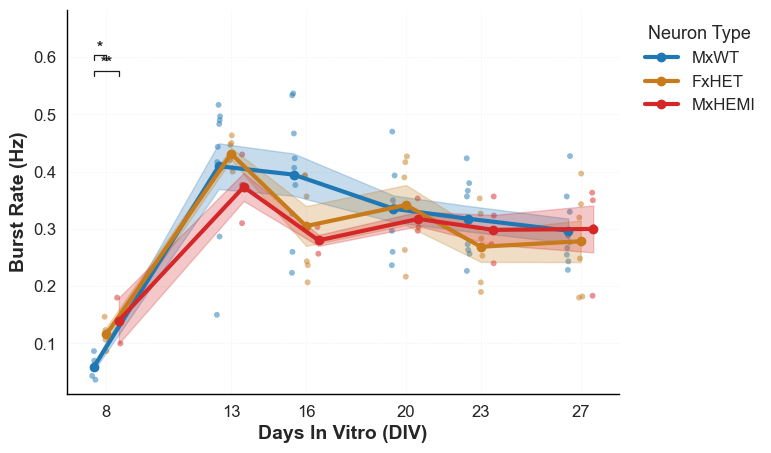

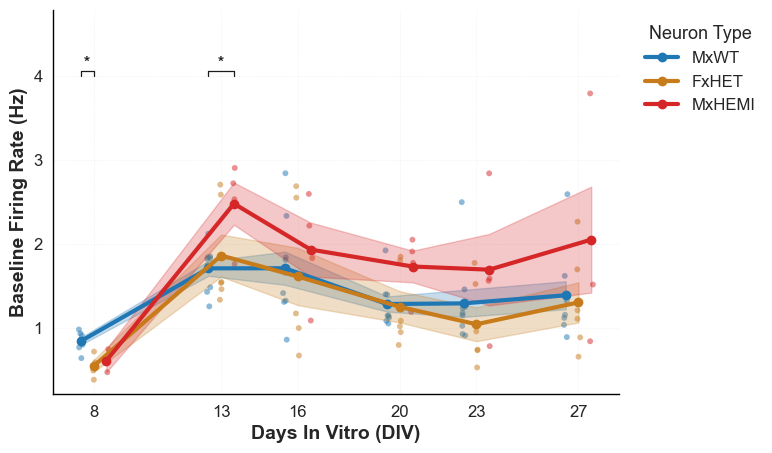

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import sem
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

plt.rcParams.update({
    "font.family": "Arial",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.0,
    "axes.labelsize": 14,
    "axes.labelweight": "bold",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "legend.title_fontsize": 13,
    "xtick.direction": "out",
    "ytick.direction": "out"
})


def plot_scalar_line_anova_tukey(
    df,
    value_col,
    feature_label=None,
    order=('MxWT', 'FxHET', 'MxHEMI'),
    palette={'MxWT': '#1f77b4', 'FxHET': '#c77b1b', 'MxHEMI': '#d62728'},
    save_path=None
):
    """Publication-quality lineplot for scalar per-well features (e.g., firing rate, amplitude)"""

    sub = df[['DIV', 'NeuronType', 'Chip_ID', 'Well', value_col]].copy()
    sub['ChipID_Well'] = sub['Chip_ID'].astype(str) + '_W' + sub['Well'].astype(str)
    sub = sub[sub['ChipID_Well'] != 'M07420_1']
    sub = sub.dropna(subset=[value_col])
    if sub.empty:
        print(f"No data for {value_col}; skipping.")
        return

    # Aggregate per independent well
    agg_df = sub.groupby(['DIV', 'ChipID_Well', 'NeuronType'])[value_col].mean().reset_index()

    # Compute group summary
    summary = (
        agg_df.groupby(['DIV', 'NeuronType'])
        .agg(mean_value=(value_col, 'mean'), sem_value=(value_col, sem))
        .reset_index()
    )

    divs = sorted(agg_df['DIV'].unique())
    group_offsets = {'MxWT': -0.5, 'FxHET': 0.0, 'MxHEMI': 0.5}

    # Figure setup
    fig, ax = plt.subplots(figsize=(8, 4.8))

    # Scatter per well (background)
    for nt, color in palette.items():
        sub_nt = agg_df[agg_df['NeuronType'] == nt]
        jitter = (np.random.rand(len(sub_nt)) - 0.5) * 0.15
        ax.scatter(sub_nt['DIV'] + jitter + group_offsets[nt],
                   sub_nt[value_col], color=color, alpha=0.5,
                   s=18, edgecolor='none', zorder=1)

    # Line + SEM (foreground)
    for nt, color in palette.items():
        sub_nt = summary[summary['NeuronType'] == nt]
        offset = group_offsets[nt]
        ax.plot(sub_nt['DIV'] + offset, sub_nt['mean_value'], '-o',
                color=color, lw=3, zorder=3, label=nt)
        ax.fill_between(sub_nt['DIV'] + offset,
                        sub_nt['mean_value'] - sub_nt['sem_value'],
                        sub_nt['mean_value'] + sub_nt['sem_value'],
                        color=color, alpha=0.25, zorder=2)

    # Stats: ANOVA + Tukey
    tukey_sig = []
    for div in divs:
        g = agg_df[agg_df['DIV'] == div].copy()
        if g['NeuronType'].nunique() < 2:
            continue

        model = ols(f"{value_col} ~ C(NeuronType)", data=g).fit()
        anova_results = anova_lm(model, typ=2)
        if 'C(NeuronType)' not in anova_results.index:
            continue
        p_anova = anova_results.loc['C(NeuronType)', 'PR(>F)']

        tuk = pairwise_tukeyhsd(g[value_col], g['NeuronType'], alpha=0.05)
        tuk_df = pd.DataFrame(tuk._results_table.data[1:], columns=tuk._results_table.data[0])

        for _, row in tuk_df.iterrows():
            if row['reject']:
                tukey_sig.append((div, row['group1'], row['group2'], float(row['p-adj'])))

    # Improved significance annotation
    ymin, ymax = ax.get_ylim()
    yrange = ymax - ymin
    ax.set_ylim(ymin, ymax + yrange * 0.22)

    for div in divs:
        sig_pairs = [(d, s1, s2, p) for (d, s1, s2, p) in tukey_sig if d == div]
        if not sig_pairs:
            continue

        sig_pairs.sort(key=lambda x: x[3])  # most significant higher
        for k, (_, s1, s2, p_adj) in enumerate(sig_pairs):
            if p_adj < 0.001:
                sig = '***'
            elif p_adj < 0.01:
                sig = '**'
            elif p_adj < 0.05:
                sig = '*'
            else:
                continue

            x1 = div + group_offsets[s1]
            x2 = div + group_offsets[s2]
            h = yrange * 0.015
            base = ymax * 1.01 + (yrange * 0.05 * k)

            ax.plot([x1, x1, x2, x2],
                    [base, base + h, base + h, base],
                    lw=0.9, c='k', clip_on=False)
            ax.text((x1 + x2) / 2, base + h * 1.25, sig,
                    ha='center', va='bottom',
                    fontsize=11, fontweight='bold',
                    color='k', clip_on=False)

    # Final styling
    ax.legend(title='Neuron Type', frameon=False, loc='upper left', bbox_to_anchor=(1.02, 1))
    ax.set_xlabel('Days In Vitro (DIV)', weight='bold')
    ax.set_ylabel(feature_label or value_col.replace('_', ' ').title(), weight='bold')
    ax.tick_params(axis='both', labelsize=12, direction='out', length=4, width=1)
    ax.set_xticks(divs)
    ax.grid(alpha=0.2, linestyle='--', linewidth=0.5)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()

plot_scalar_line_anova_tukey(
    network_csv,
    value_col='burstRate',
    feature_label='Burst Rate (Hz)',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/line_burst_rate.svg"
)

plot_scalar_line_anova_tukey(
    network_csv,
    value_col='BaselineFiringRate',
    feature_label='Baseline Firing Rate (Hz)',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/line_baseline_FR.svg"
)

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_61582/2611883571.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_61582/2611883571.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_61582/2611883571.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = sub.groupby('NeuronType')['Burst_Time'].count()
/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/

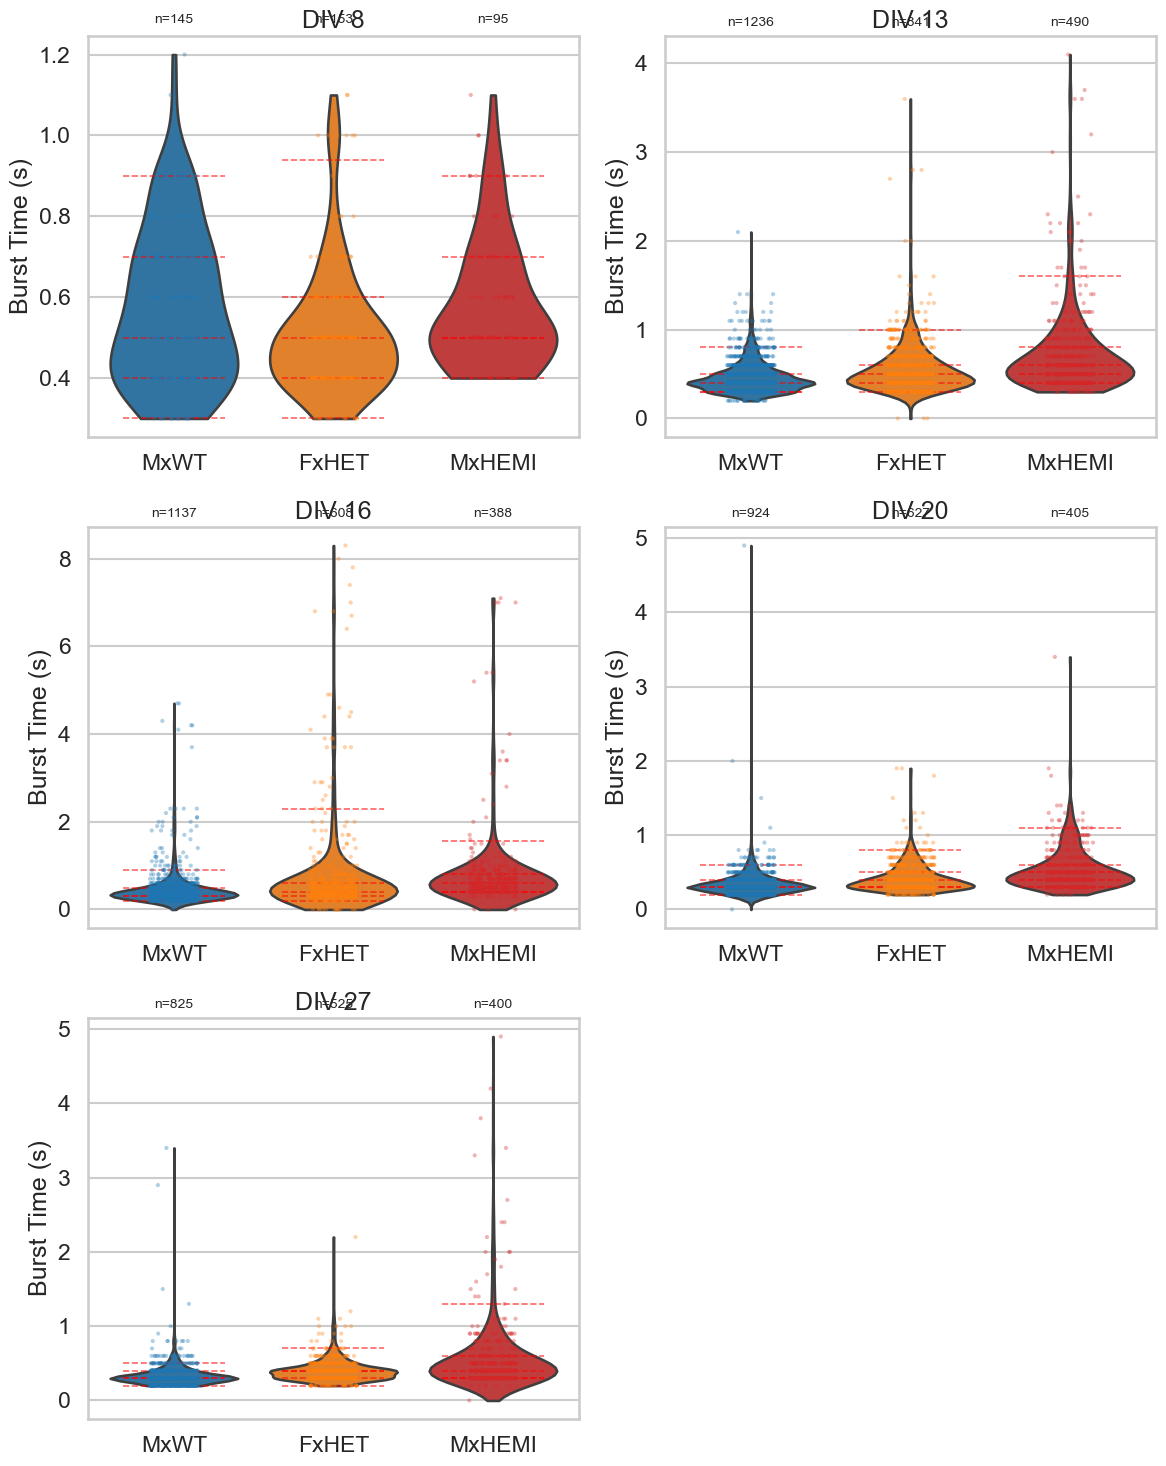

/Users/mandarmp/anaconda3/envs/map/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_61582/2611883571.py:114: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


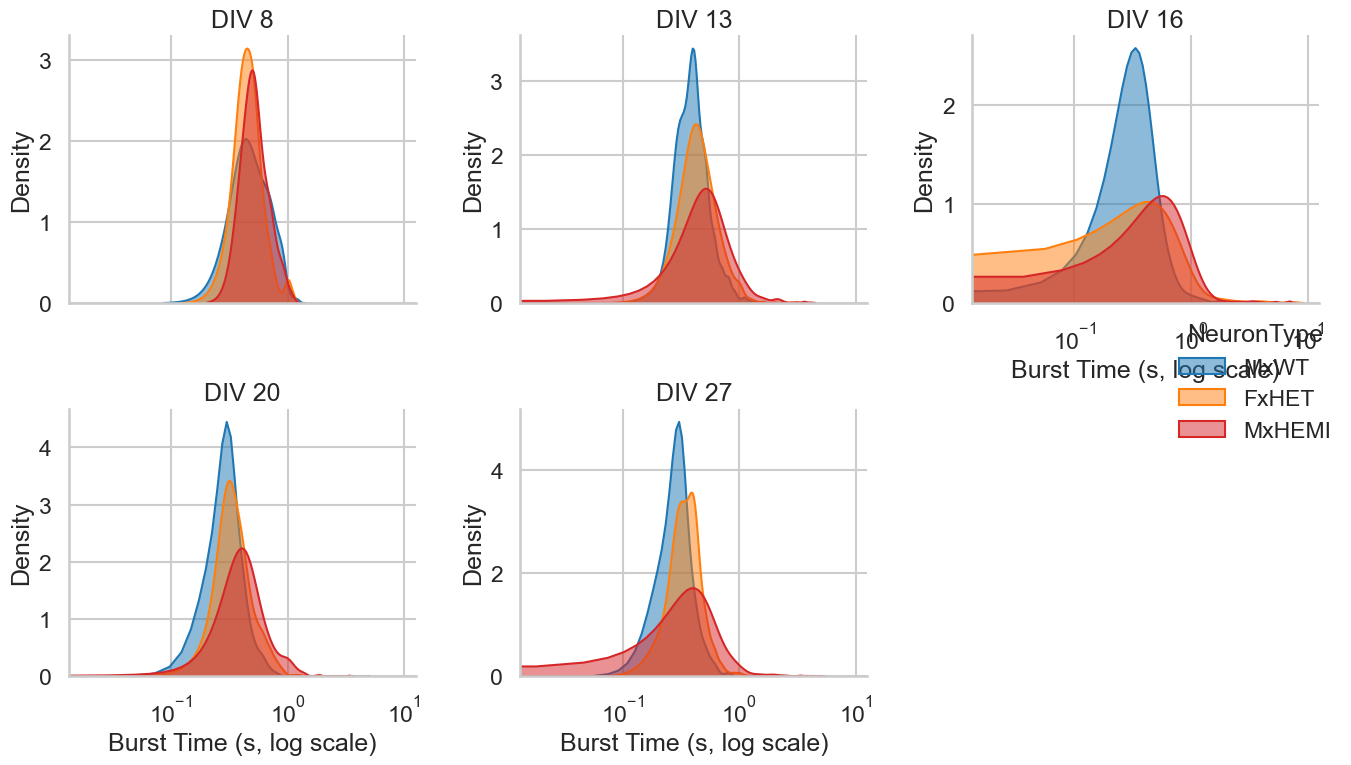

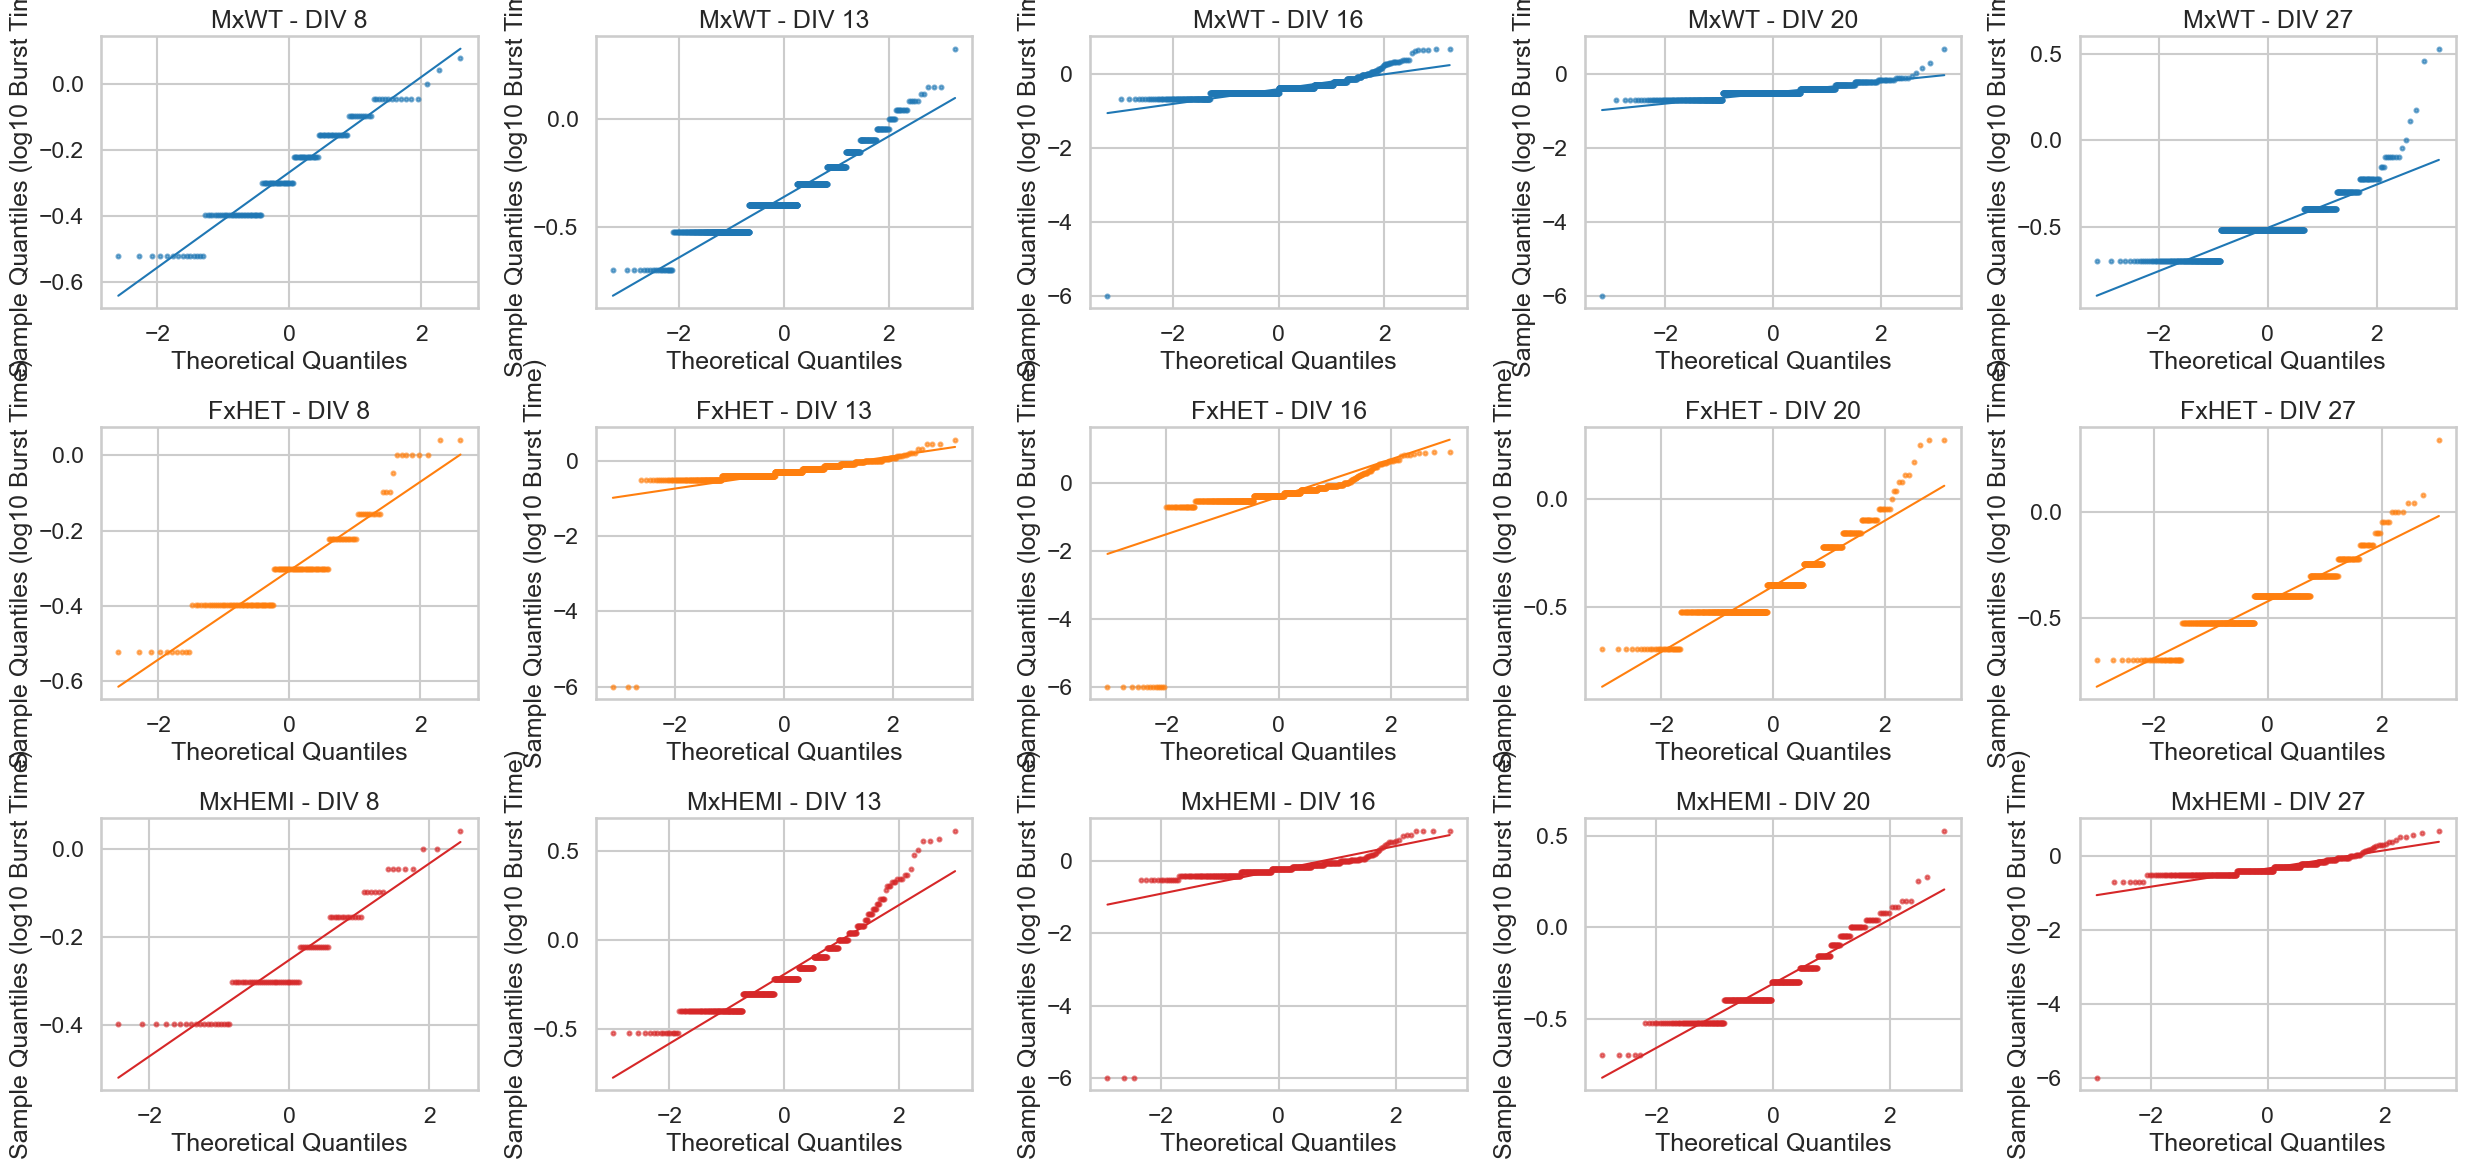

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# ---------------------------
# Prep: tidy data and palette
# ---------------------------

# Copy/select needed columns and tidy list column
long_df = network_csv[['DIV', 'Well', 'Chip_ID', 'NeuronType', 'Burst_Times_List_Numeric']].copy()
long_df = long_df.rename(columns={'Burst_Times_List_Numeric': 'Burst_Time_List'})
long_df['ChipID_Well'] = long_df['Chip_ID'].astype(str) + '_W' + long_df['Well'].astype(str)

# Explode bursts to long format
long_df = long_df.explode('Burst_Time_List').reset_index(drop=True)
long_df = long_df.rename(columns={'Burst_Time_List': 'Burst_Time'})
long_df['Burst_Time'] = pd.to_numeric(long_df['Burst_Time'], errors='coerce')
long_df.dropna(subset=['Burst_Time'], inplace=True)

# Categorical order and fixed palette (consistent across plots)
order = ['MxWT', 'FxHET', 'MxHEMI']
palette = {'MxWT': '#1f77b4', 'FxHET': '#ff7f0e', 'MxHEMI': '#d62728'}  # tab10 subset

# Ensure consistent category dtype/order
long_df['NeuronType'] = pd.Categorical(long_df['NeuronType'], categories=order, ordered=True)

# Sort DIVs and ensure stable order across figures
div_order = sorted(long_df['DIV'].unique())

# Set seaborn theme
sns.set_theme(style='whitegrid', context='talk')

# ---------------------------------------------------------
# Figure 1: Violin + raw points + percentile lines per DIV
# ---------------------------------------------------------

n_divs = len(div_order)
nrows = min(3, n_divs)
ncols = int(np.ceil(n_divs / nrows)) if n_divs > 0 else 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 5 * nrows), squeeze=False)
axes_flat = axes.flatten()

for i, div in enumerate(div_order):
    ax = axes_flat[i]
    sub = long_df[long_df['DIV'] == div]

    # Violin plot
    sns.violinplot(
        data=sub, x='NeuronType', y='Burst_Time',
        order=order, palette=palette, inner=None, cut=0, ax=ax
    )  # cut=0 to avoid extending beyond data [web:108][web:109]

    # Raw data points
    sns.stripplot(
        data=sub, x='NeuronType', y='Burst_Time',
        order=order, palette=palette, dodge=False, size=3, jitter=0.15, alpha=0.35, ax=ax
    )  # use same palette for consistency [web:107][web:110]

    # Percentiles per group
    ymax = sub['Burst_Time'].max() if len(sub) else 1.0
    for j, nt in enumerate(order):
        vals = sub.loc[sub['NeuronType'] == nt, 'Burst_Time'].to_numpy()
        if vals.size:
            pcts = np.percentile(vals, [5, 25, 50, 75, 95])
            for pct in pcts:
                ax.hlines(pct, j - 0.32, j + 0.32, colors='red', linewidth=1.2, linestyles='--', alpha=0.6)

    # Optional log scale (uncomment if distributions are heavy-tailed)
    # ax.set_yscale('log')  # careful if zero values exist [web:110]
    # ax.set_ylim(bottom=long_df['Burst_Time'][long_df['Burst_Time']>0].min() * 0.5)

    ax.set_title(f'DIV {div}')
    ax.set_xlabel('')
    ax.set_ylabel('Burst Time (s)')

    # Sample size annotation above violins
    group_counts = sub.groupby('NeuronType')['Burst_Time'].count()
    top = ax.get_ylim()[1]
    for j, nt in enumerate(order):
        n = int(group_counts.get(nt, 0))
        ax.text(j, top * 1.02, f'n={n}', ha='center', va='bottom', fontsize=10)

# Turn off unused subplots
for ax in axes_flat[n_divs:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Figure 2: KDE by DIV with consistent colors (FacetGrid)
# -------------------------------------------------------

# To avoid negative/zero issues on log scale, drop nonpositive if logging x
kde_df = long_df.copy()
kde_df = kde_df[kde_df['Burst_Time'] > 0]

g = sns.FacetGrid(kde_df, col='DIV', hue='NeuronType', col_order=div_order,
                  hue_order=order, palette=palette, col_wrap=3, height=4, sharey=False)

g.map(sns.kdeplot, 'Burst_Time', common_norm=False, fill=True, alpha=0.5, bw_adjust=1.0)  # consistent hue palette [web:114][web:110]

# Log x-scale and labels per facet
for ax, div in zip(g.axes.flat, div_order):
    ax.set_xscale('log')
    ax.set_title(f'DIV {div}')
    ax.set_xlabel('Burst Time (s, log scale)')
    ax.set_ylabel('Density')

g.add_legend(title='NeuronType')
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Figure 3: Q-Q plots (log10 transform) per NeuronType × DIV
# ------------------------------------------------------------

fig, axes = plt.subplots(len(order), n_divs, figsize=(5 * n_divs, 4 * len(order)), squeeze=False)

for col_i, div in enumerate(div_order):
    sub_div = long_df[long_df['DIV'] == div]
    for row_i, nt in enumerate(order):
        ax = axes[row_i, col_i]
        data = sub_div.loc[sub_div['NeuronType'] == nt, 'Burst_Time'].to_numpy()

        color = palette.get(nt, 'black')  # consistent color per NeuronType [web:110]
        if data.size:
            # Add epsilon before log to avoid -inf
            log_data = np.log10(np.clip(data, a_min=1e-6, a_max=None))
            osm, osr = stats.probplot(log_data, dist="norm")[:2]
            # Draw manually to control color
            (theoretical, sample), (slope, intercept, r) = stats.probplot(log_data, dist="norm")
            ax.scatter(theoretical, sample, s=8, alpha=0.6, color=color)
            # Fit line
            xline = np.linspace(theoretical.min(), theoretical.max(), 100)
            yline = slope * xline + intercept
            ax.plot(xline, yline, color=color, linewidth=1.5)
            ax.set_title(f'{nt} - DIV {div}')
            ax.set_xlabel('Theoretical Quantiles')
            ax.set_ylabel('Sample Quantiles (log10 Burst Time)')
        else:
            ax.text(0.5, 0.5, 'No data', ha='center', va='center')
            ax.axis('off')

plt.tight_layout()
plt.show()
